<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module_13_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 13 - Practice Notebook
This notebook includes TODO markers **inside code cells** so students complete the missing parts.

In [1]:
#Import all required libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt


## Load Insurance Dataset

In [3]:
# Load the insurance dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(url)
df = insurance.copy()
# TODO: Display first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Overview

In [7]:
# TODO: Print dataset info
display(df.info())

# TODO: Print descriptive statistics
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Define Features and Target

In [9]:
from numpy._core import numeric
# TODO: Set numeric and categorical feature lists
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

# TODO: Define target column
target_col = 'charges'

# TODO: Create X and y
X = df.drop(target_col, axis=1)
y = df[target_col]

# TODO: Display X head
X.head()


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


## Train Test Split

In [10]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1070, 6), (268, 6))

## Multiple Linear Regression Pipeline

In [12]:
# Build preprocessing transformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

# TODO: Build full pipeline with LinearRegression
pipe = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("linreg", LinearRegression()),
    ]
)

# TODO: Fit the model
mlr_model = pipe.fit(X_train, y_train)


## Regression Performance Function

In [14]:
# TODO: Complete function to print performance
def print_performance(y_true, y_pred):
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R2:", r2_score(y_true, y_pred))


## Evaluate Model

In [16]:
# Predict for train and test sets
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

# TODO: Print train and test performance
print("Train Performance:")
print_performance(y_train, y_train_pred)

Train Performance:
MSE: 37277681.70201866
RMSE: 6105.545160099847
MAE: 4208.234572492228
R2: 0.7417255854683333


## Inspect Coefficients

In [17]:
# Extract feature names after OneHotEncoding
ohe = mlr_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(cat_feature_names)

# Extract model coefficients
linreg = mlr_model.named_steps["linreg"]
coeffs = pd.DataFrame({"feature": all_feature_names, "coefficient": linreg.coef_})

# Print intercept and coefficients
print("Intercept:", linreg.intercept_)
coeffs.sort_values("coefficient", ascending=False)


Intercept: -11931.219050326667


,feature,coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


## Plot Actual vs Predicted

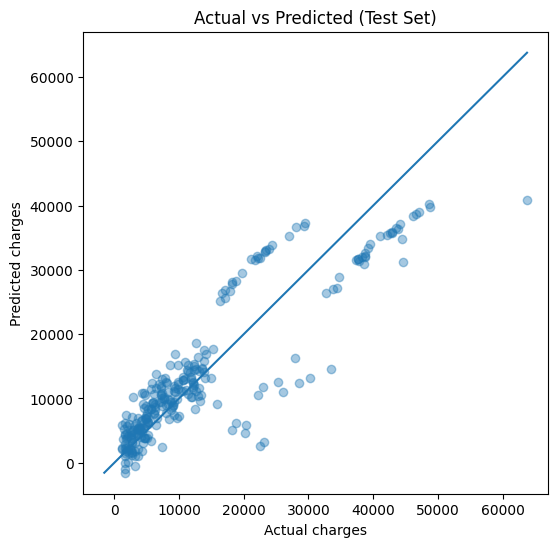

In [18]:
# Plot scatter of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted (Test Set)")

# Add diagonal line
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims)

plt.show()


## Part B: Polynomial Regression Practice

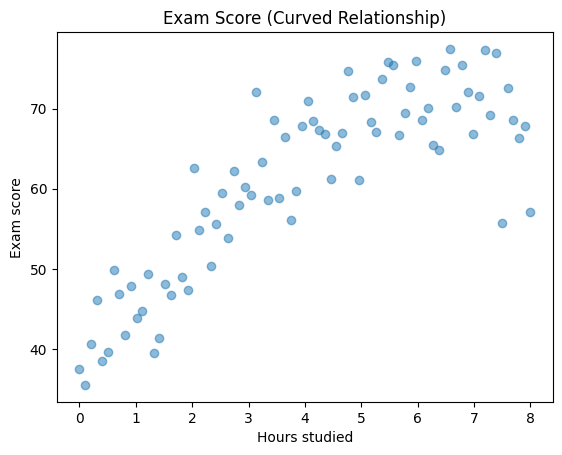

In [19]:
# Generate synthetic curved dataset
np.random.seed(42)

X_hours = np.linspace(0, 8, 80).reshape(-1, 1)
noise = np.random.normal(0, 5, size=X_hours.shape[0])

y_scores = 35 + 12 * X_hours[:, 0] - 1 * (X_hours[:, 0] ** 2) + noise

# Plot the data
plt.scatter(X_hours, y_scores, alpha=0.5)
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Exam Score (Curved Relationship)")
plt.show()


In [ ]:
# Train test split for polynomial data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hours, y_scores, test_size=0.2, random_state=42
)


In [ ]:
# TODO: Create helper to fit polynomial model
def fit_poly

In [ ]:
# TODO: Fit models for degrees 1, 2, 3, 8



In [ ]:
# TODO: Plot fitted curves for each degree (R2,RMSE)



## TODO: Final Reflection
Write answers to:
1. Which polynomial degree overfits and why
2. Which degree gives best generalization
3. What you learned about MLR and polynomial regression.